In [80]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


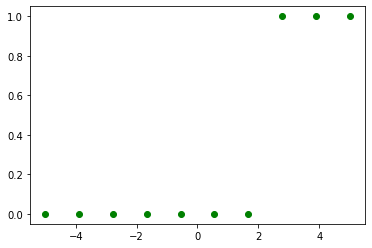

In [81]:
x = np.linspace(-5, 5, 10)
y = x.copy()

y[x >= 2] = 1
y[x < 2] = 0

plt.plot(x, y, 'go')

In [82]:
offsetY = np.random.rand()
offsetX = np.random.rand()
w = np.random.rand()

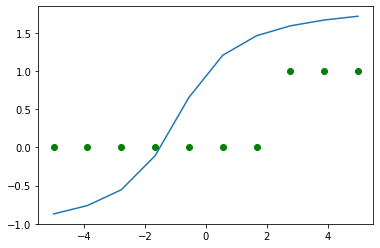

In [83]:
plt.plot(x, y, 'go')
plt.plot(x, np.arctan((x + offsetX) * w) + offsetY)


In [84]:
predictions = (np.arctan((x + offsetX) * w) + offsetY)

np.c_[y, predictions]

array([[ 0.        , -0.87087174],
       [ 0.        , -0.76103202],
       [ 0.        , -0.55421603],
       [ 0.        , -0.10817974],
       [ 0.        ,  0.6561091 ],
       [ 0.        ,  1.2086875 ],
       [ 0.        ,  1.46428657],
       [ 1.        ,  1.59412389],
       [ 1.        ,  1.67021316],
       [ 1.        ,  1.71967233]])

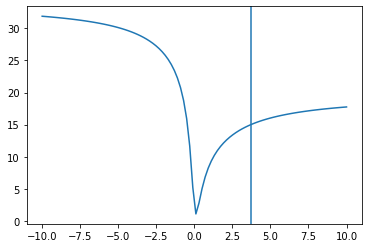

In [361]:
weights = np.linspace(-10, 10, 100)

errors = []
for weight in weights:
    predictions = (np.arctan((x + offsetX) * weight) + offsetY)

    error = np.sum(np.square(y - predictions))

    errors.append(error)

index = 68
plt.plot(weights, errors)
plt.axvline(weights[index])

def calc_slope_at_weight(weight, offsetY, offsetX):
    top = 2 * (x + offsetX) * (y - np.arctan((x + offsetX) * weight) - offsetY)
    bottom = np.square(x) * np.square(x + offsetX) + 1

    return np.sum(-1 * (top / bottom))

def calc_slope_at_offsetY(weight, offsetY, offsetX):
    return np.sum(-2 * (y - np.arctan((x + offsetX) * weight) - offsetY))

def calc_slope_at_offsetX(weight, offsetY, offsetX):
    top = 2 * weight * (y - offsetY - np.arctan(weight * (x + offsetX)))
    bottom = np.square(weight) * np.square(x + offsetX) + 1

    return np.sum(-1 * (top / bottom))

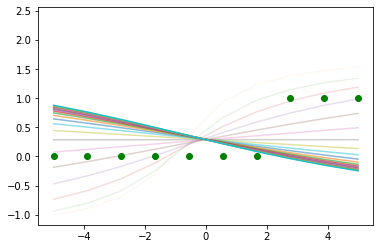

In [415]:
epochs = 2000
learning_rate = 0.001

next_weight = 1
next_offsetY = 1
next_offsetX = 1

for epoch in range(epochs):
    slope_at_w = calc_slope_at_weight(next_weight, next_offsetY, next_offsetX)
    slope_at_offsetY = calc_slope_at_offsetY(next_weight, next_offsetY, next_offsetX)
    slope_at_offsetX = calc_slope_at_offsetX(next_weight, next_offsetY, next_offsetX)

    next_weight = next_weight - learning_rate * slope_at_w
    next_offsetY = next_offsetY - learning_rate * slope_at_offsetY
    next_offsetX = next_offsetX - learning_rate * slope_at_offsetX

    if epoch % 100 == 0:
        plt.plot(x, np.arctan((x + next_offsetX) * next_weight) + next_offsetY, label=f'Epoch number {epoch / 100}', alpha=(epoch / 100) / 19)

plt.plot(x, y, 'go')
# plt.legend()